<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Prediction_Thoracic_surgery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Death of Survice after thoracic surgery 

---
 Thoracic Surgery prediction example:
 
 The data is dedicated to classification problem related to the post-operative life
 expectancy in the lung cancer patients after thoracic surgery
 in which there are two classes class 1 - the death of patients
 within one year after surgery and class 2 – the patients who survive.
 The data was collected retrospectively at Wroclaw Thoracic Surgery Centre
 for patients who underwent major lung resections for primary lung cancer in the years 2007 to 2011.
 The Centre is associated with the Department of Thoracic Surgery of the Medical University
 of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland,
 while the research database constitutes a part of the National Lung Cancer Registry,
 administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## Data

---


 Data from the UC Irvine Machine Learning Repository

 https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data
 
 https://www.kaggle.com/sid321axn/thoraric-surgery
 
 Attribute Information:
 1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary
       as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
 2. PRE4: Forced vital capacity - FVC (numeric)
 3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
 4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
 5. PRE7: Pain before surgery (T,F)
 6. PRE8: Haemoptysis before surgery (T,F)
 7. PRE9: Dyspnoea before surgery (T,F)
 8. PRE10: Cough before surgery (T,F)
 9. PRE11: Weakness before surgery (T,F)
 10. PRE14: T in clinical TNM - size of the original tumour,
       from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
 11. PRE17: Type 2 DM - diabetes mellitus (T,F)
 12. PRE19: MI up to 6 months (T,F)
 13. PRE25: PAD - peripheral arterial diseases (T,F)
 14. PRE30: Smoking (T,F)
 15. PRE32: Asthma (T,F)
 16. AGE: Age at surgery (numeric)
 17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/My Drive/My Colab/dataset/ThoraricSurgery.csv')
df1 = df
df1.replace({
    'T':1,
    'F':0,
    'PRZ0':0,
    'PRZ1':1,
    'PRZ2':2,
    'OC10':0,
    'OC11':1,
    'OC12':2,
    'OC13':3,
    'OC14':4,
    'OC15':5,
},inplace=True)
df1.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2b8535fd0>,
      dtype=object)

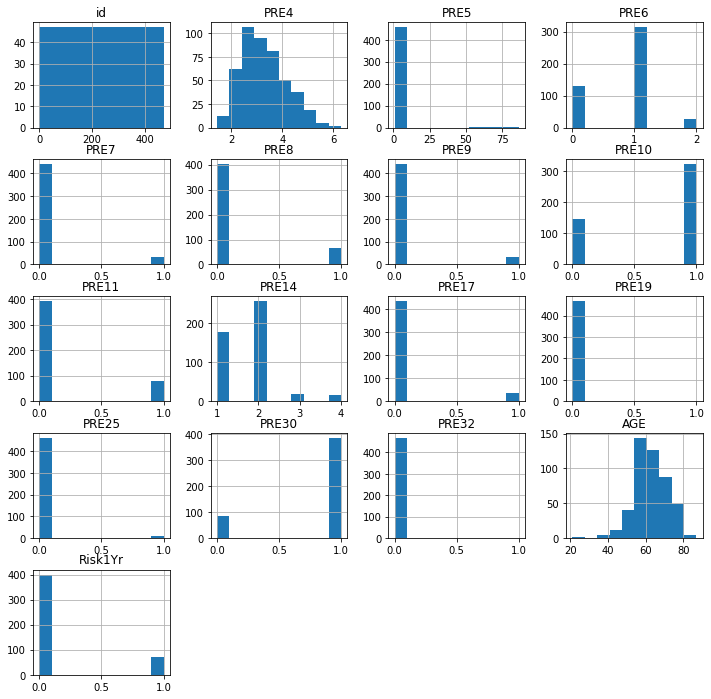

In [9]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df1.hist(ax = ax)

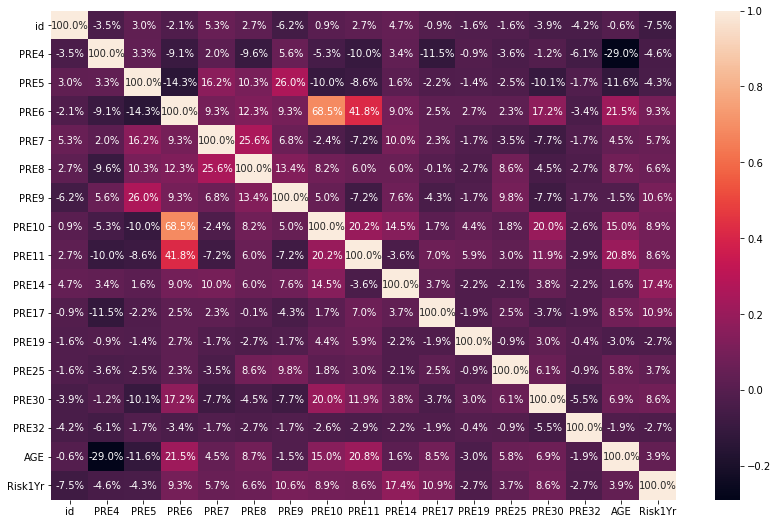

In [10]:
plt.figure(figsize=(14,9))
sns.heatmap(df1.corr(), fmt='.1%', annot=True)

## Train data

In [11]:
x = df1.loc[:,['PRE4','PRE5','PRE6','PRE7','PRE8','PRE9','PRE10',
               'PRE11','PRE14','PRE17','PRE19','PRE25','PRE30','PRE32','AGE']]
y = df1['Risk1Yr']

## Model

In [12]:
model = \
    tf.keras.Sequential([
    tf.keras.layers.Flatten(input_dim=15),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x, y, epochs=50, batch_size=10)

Epoch 1/50
47/47 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.8489
Epoch 2/50
47/47 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8617
Epoch 3/50
47/47 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8489
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8489
Epoch 5/50
47/47 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8468
Epoch 6/50
47/47 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8489
Epoch 7/50
47/47 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8574
Epoch 8/50
47/47 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8468
Epoch 9/50
47/47 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8553
Epoch 10/50
47/47 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8489
Epoch 11/50
47/47 [

In [18]:
loss, acc = model.evaluate(x, y, verbose=2)
print('Loss:',loss,'Accuracy:',acc)

15/15 - 0s - loss: 0.3841 - accuracy: 0.8489
Loss: 0.3841319978237152 Accuracy: 0.848936140537262


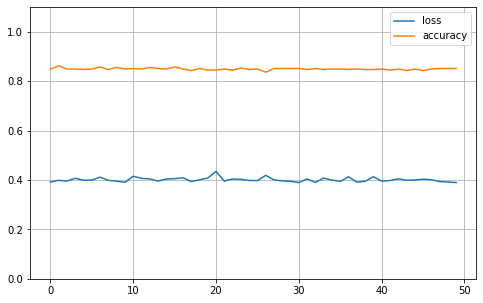

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1.1)
plt.show()